### Masking Examples

In [26]:
import flimview.flim as flim
import flimview.io_utils as io
import flimview.plot_utils as pu
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import flimview 

In [27]:
## flimview version
flimview.__version__

'1.0.1'

In [28]:
### SDT File
sdtfile = 'data/epidermis.sdt'

In [29]:
## Read data and header from file
data,header = io.read_sdt_file(sdtfile)

In [30]:
## print header
header

{'flimview': {'sdt_info': '*IDENTIFICATION\n  ID        : \x04SPC FCS Data File\x04\n  Title     : 34_N_760nm_c07\n  Version   : 3  966 M\n  Revision  : 8 bits ADC\n  Date      : 2019-03-05\n  Time      : 16:49:19\n  Author    : System\n  Company   : Unknown\n  Contents  : Autosaved results for cycle 7 of 40 from FIFO_IMAGE measurement\n*END\n\n',
  'filename': 'epidermis.sdt',
  'pathname': 'data',
  'xpix': 256,
  'ypix': 256,
  'tpix': 256,
  'tresolution': 48.86091184430619}}

In [10]:
## Create a FlimCube
fc = flim.FlimCube(data, header)

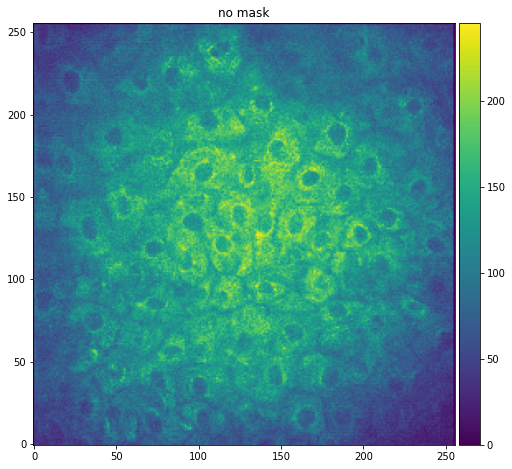

In [11]:
## Use plot utilities to visualize
pu.plot2d(fc.intensity, title='no mask')

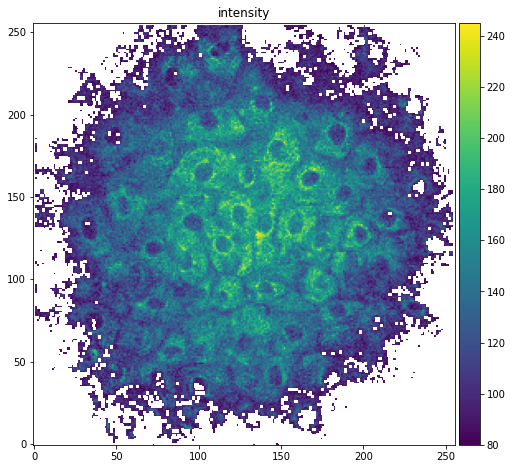

In [12]:
## Mask by intensity
fc.mask_intensity(80)
pu.plot2d(fc.intensity, title='intensity')

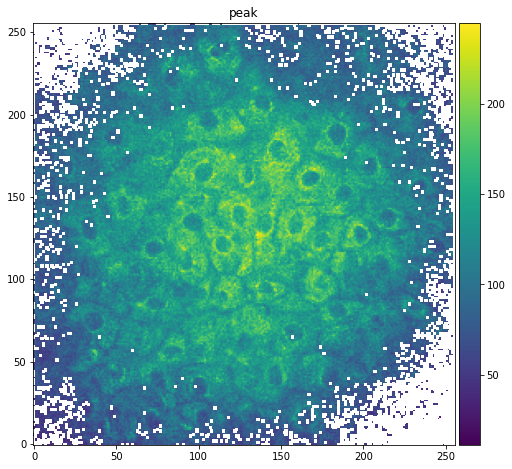

In [13]:
## Mask by peak
fc.mask_peak(4)
pu.plot2d(fc.intensity, title='peak')

In [14]:
## Create a custom mask
xc, yc = 128, 128
n = 256
r = 130
y,x = np.ogrid[-xc:n-xc, -yc:n-yc]
disk = x*x + y*y > r*r
array = np.ones((n, n))
array[disk] = 0

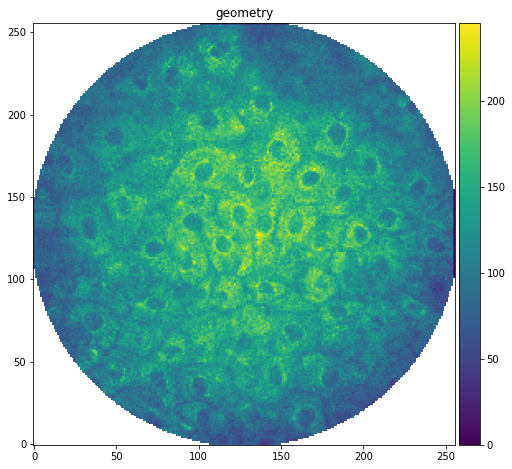

In [15]:
## This is the result
fc.mask_peak(0, mask=disk)
pu.plot2d(fc.intensity, title='geometry')

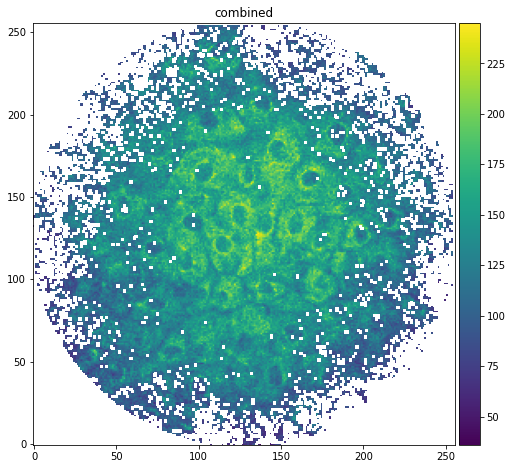

In [17]:
## Combined
fc.mask_peak(5)
mask5 = fc.mask
fc.mask_peak(0, mask=mask5|disk) ## Use OR
pu.plot2d(fc.intensity, title='combined')

In [19]:
## Bin data
fc_bin = flim.binCube(fc, bin=3, kernel='gauss', sigma=1)

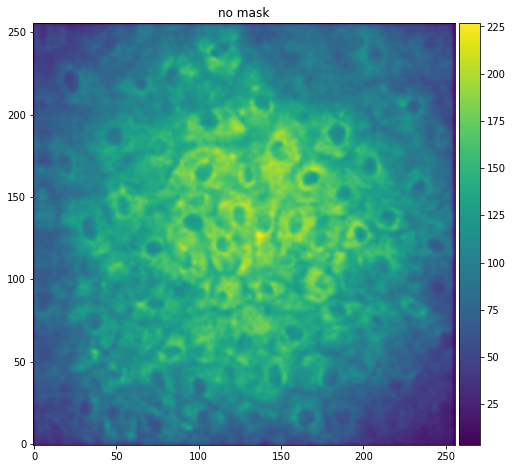

In [20]:
## Plot with no mask
pu.plot2d(fc_bin.intensity, title='no mask')

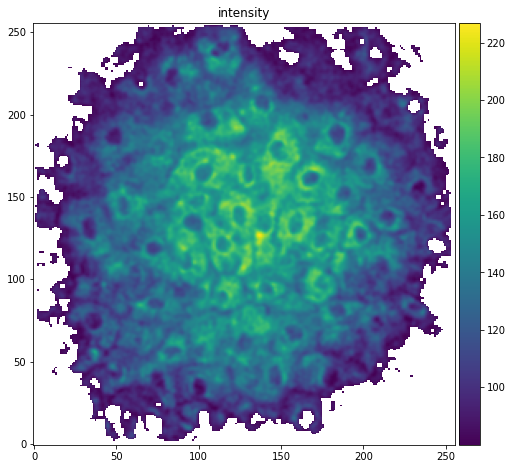

In [22]:
## Mask by intensity
fc_bin.mask_intensity(80)
pu.plot2d(fc_bin.intensity, title='intensity')

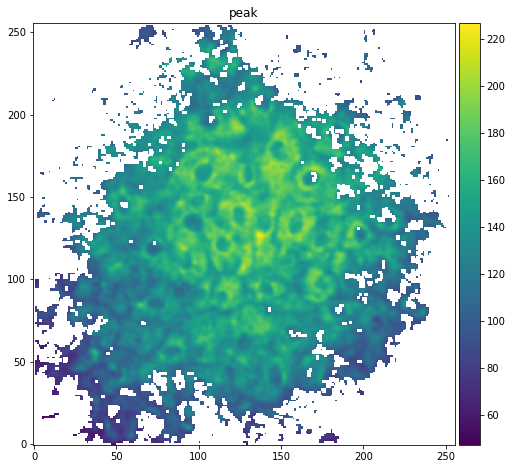

In [23]:
## Mask by peak
fc_bin.mask_peak(4)
pu.plot2d(fc_bin.intensity, title='peak')

In [24]:
## Remove all mask
fc.unmask()
fc_bin.unmask()

### Figure 2

Text(0.5, 1.0, 'Combined mask')

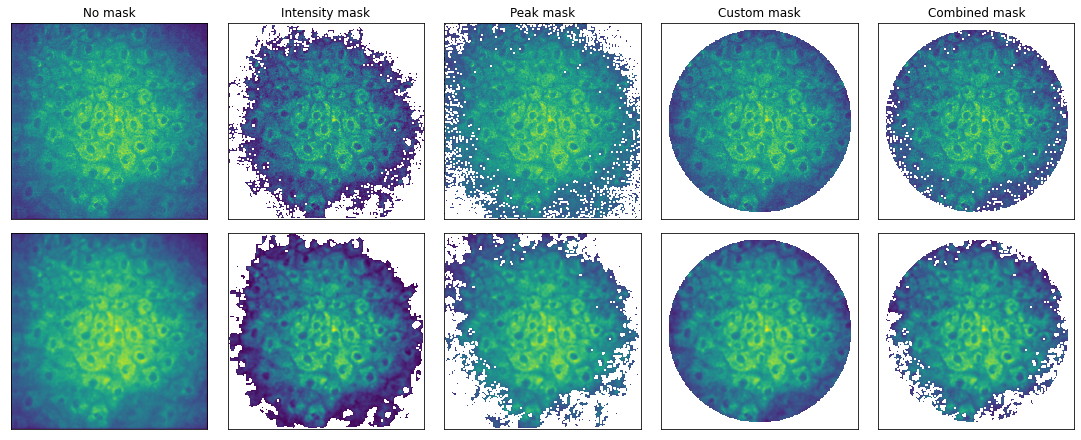

In [25]:
fc.unmask()
fc_bin.unmask()
fig = plt.figure(constrained_layout=True, figsize=(15,6))
spec2 = gridspec.GridSpec(ncols=5, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0])
ax2 = fig.add_subplot(spec2[1])
ax3 = fig.add_subplot(spec2[2])
ax4 = fig.add_subplot(spec2[3])
ax5 = fig.add_subplot(spec2[4])
ax6 = fig.add_subplot(spec2[5])
ax7 = fig.add_subplot(spec2[6])
ax8 = fig.add_subplot(spec2[7])
ax9 = fig.add_subplot(spec2[8])
ax10 = fig.add_subplot(spec2[9])

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])
ax5.set_xticks([])
ax6.set_xticks([])
ax7.set_xticks([])
ax8.set_xticks([])
ax9.set_xticks([])
ax10.set_xticks([])


ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])
ax7.set_yticks([])
ax8.set_yticks([])
ax9.set_yticks([])
ax10.set_yticks([])

#No mask
ax1.imshow(fc.intensity)
ax6.imshow(fc_bin.intensity)
ax1.set_title('No mask')

#intensity
fc.mask_intensity(80)
fc_bin.mask_intensity(80)
ax2.imshow(fc.intensity)
ax7.imshow(fc_bin.intensity)
ax2.set_title('Intensity mask')

#peak
fc.mask_peak(4)
fc_bin.mask_peak(3.4)
ax3.imshow(fc.intensity)
ax8.imshow(fc_bin.intensity)
ax3.set_title('Peak mask')

#geometry
xc, yc = 128, 128
n = 256
r = 120
y,x = np.ogrid[-xc:n-xc, -yc:n-yc]
disk = x*x + y*y > r*r
array = np.ones((n, n))
array[disk] = 0
fc.mask_peak(0, mask=disk)
fc_bin.mask_peak(0, mask=disk)
ax4.imshow(fc.intensity)
ax9.imshow(fc_bin.intensity)
ax4.set_title('Custom mask')


#combined

fc.mask_peak(4)
mask_peak_raw = fc.mask
fc.mask_peak(0, mask=mask_peak_raw|disk)

fc_bin.mask_peak(3.4)
mask_peak_bin = fc_bin.mask
fc_bin.mask_peak(0, mask=mask_peak_bin|disk)

ax5.imshow(fc.intensity)
ax10.imshow(fc_bin.intensity)
ax5.set_title('Combined mask')


## Uncomment to save figure
##plt.savefig('figures/masking.png',  bbox_inches = 'tight')